#Assignment04. Origin-Destination Analysis with NetworkX

##Install and Import Packages

In [ ]:
# Install packages

!pip install fiona
!pip install geopandas
!pip install folium
!pip install sodapy -q
!pip install adjustText
!pip install plotly --upgrade
!pip install contextily
!pip install mapclassify
!pip install chart-studio
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install pygeos

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=67211bb94f32921b3ca74aa5dd5ba3533989ff4c30262ef9e3ed2f4c57ce2c90
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
     |████████████████████████████████| 25.3 MB 60.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 64 kB 1.7 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspat

In [ ]:
!pip install decorator
!pip install pandapower

     |████████████████████████████████| 5.8 MB 7.8 MB/s 
     |████████████████████████████████| 149 kB 34.9 MB/s 
     |████████████████████████████████| 3.6 MB 35.2 MB/s 
  Created wheel for pandapower: filename=pandapower-2.7.0-py3-none-any.whl size=5777358 sha256=8ef59226ec51752415f89d0f44f30e9a5cf05399bd4f024f8c1e151411f21ce7
  Stored in directory: /root/.cache/pip/wheels/ff/e6/b6/c9218d5a45a02f4bdb220272f2bac4f59c5b73ed08a08125c3
Successfully built pandapower


In [ ]:
# Import packages
# To ignore unimporant system warnings
import warnings
warnings.filterwarnings("ignore")

# We will use Pandas, Numpy, and Matplotlib which is a package for visualization with Python
import pandas as pd
import numpy as np

# Load a required package 
# This is a library for accessing and parsing data through URLs
from urllib.parse import urlencode
import urllib.request, json 
from bs4 import BeautifulSoup # for web scraping
import fiona
import plotly.express as px
import geopandas as gpd
import adjustText as aT
import seaborn as sns # visualization styling package
import plotly.graph_objects as go
import urllib, json
import chart_studio.plotly as py
import chart_studio.tools as tls
import os
import plotly
from sodapy import Socrata
from IPython.display import Image, display
from shapely.geometry import shape
from shapely.geometry import Point 
from shapely.geometry import Polygon
import time
from shapely.geometry import shape
import contextily as ctx
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

import networkx as nx #library supporting networks

%matplotlib inline 
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
import folium
from folium.plugins import HeatMap

#Chart Studio API
import chart_studio
username='bkirthi'
api_key='PHHYaOZKZDA7BF3nUUtO'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [ ]:
# import more packages
import plotly.io as pio
pio.renderers.default = "colab"
access_token = 'pk.eyJ1IjoiYmtpcnRoaSIsImEiOiJja3VpdzFiMnoycnYyMzBtYXM1aW1uemd0In0.knHw7eYrN8DvrrBHZugW8Q'
px.set_mapbox_access_token(access_token) # for interactive plotly viz

import plotly.graph_objects as go
import chart_studio.plotly as py
import chart_studio.tools as tls

##Import Citibike Rideshare Data
Downloadable from https://www.citibikenyc.com/system-data. Click “Downloadable files of Citi Bike trip data” or “Download Citi Bike trip history data”.

Here, download the data for mayust 2021.


In [ ]:
# clone github
!git clone https://github.com/kirthi-b/CitiBike-NetworkX

Cloning into 'CitiBike-NetworkX'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 32 (delta 10), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
may = pd.read_csv("/content/CitiBike-NetworkX/Data/202105.csv")

In [ ]:
may.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,74A4206E7487CBC9,docked_bike,2021-05-23 16:51:00,2021-05-23 18:38:21,9 St HBLR - Jackson St & 8 St,HB305,9 St HBLR - Jackson St & 8 St,HB305,40.747907,-74.038411,40.747907,-74.038412,casual
1,58EEE2950FFE01CE,docked_bike,2021-05-31 16:54:47,2021-05-31 16:55:28,9 St HBLR - Jackson St & 8 St,HB305,9 St HBLR - Jackson St & 8 St,HB305,40.747907,-74.038411,40.747907,-74.038412,member
2,1429D912C16EEE59,docked_bike,2021-05-25 16:19:34,2021-05-25 17:03:06,9 St HBLR - Jackson St & 8 St,HB305,9 St HBLR - Jackson St & 8 St,HB305,40.747907,-74.038411,40.747907,-74.038412,casual
3,FE9C5B74167CBCCD,docked_bike,2021-05-22 17:32:19,2021-05-22 17:41:27,9 St HBLR - Jackson St & 8 St,HB305,Grand St & 2 St,HB405,40.747907,-74.038411,40.739130,-74.036180,casual
4,B88D37626F000BBA,docked_bike,2021-05-14 09:48:34,2021-05-14 10:17:36,Union St,JC051,Newark Ave,JC032,40.718211,-74.083639,40.721525,-74.046305,casual


In [ ]:
print(may.shape)

(45043, 13)


In [ ]:
may = may[['ride_id','started_at','ended_at','start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng']]

In [ ]:
may_sub = may_rev = may[['start_station_name','start_lat','start_lng']]
may_sub.shape[0]

45043

In [ ]:
may_rev = may[['end_station_name','end_lat','end_lng']]
may_rev = may_rev.rename(columns={"end_station_name":"start_station_name","end_lat":"start_lat","end_lng":"start_lng"})
may_rev.shape[0]

45043

In [ ]:
#get count of rides per route
may_count = may.groupby(['start_station_name','end_station_name']).size().to_frame('count').reset_index()
may_df = pd.DataFrame(may_count)
may_count.head()

,start_station_name,end_station_name,count
0,11 St & Washington St,11 St & Washington St,290
1,11 St & Washington St,12 Ave & W 40 St,2
2,11 St & Washington St,2 St HBLR - 2 St & Marshall St,4
3,11 St & Washington St,4 St & Grand St,16
4,11 St & Washington St,6 St & Grand St,26


In [ ]:
#get list of all routes
tot = pd.concat([may_sub,may_rev])
tot_count = tot.groupby(['start_station_name']).size().to_frame('count').reset_index()
tot_df = pd.DataFrame(tot_count)
tot_df.head()

,start_station_name,count
0,11 Ave & W 59 St,2
1,11 St & Washington St,2839
2,12 Ave & W 40 St,2
3,2 St HBLR - 2 St & Marshall St,352
4,4 St & Grand St,203


In [ ]:
tot.shape[0]

90086

In [ ]:
tot = tot.drop_duplicates()
tot.shape[0]

218

In [ ]:
tot = pd.merge(tot, tot_df, on="start_station_name")

In [ ]:
tot.head()

,start_station_name,start_lat,start_lng,count
0,9 St HBLR - Jackson St & 8 St,40.747907,-74.038411,193
1,9 St HBLR - Jackson St & 8 St,40.747907,-74.038412,193
2,9 St HBLR - Jackson St & 8 St,40.747907,-74.038412,193
3,Union St,40.718211,-74.083639,162
4,Union St,40.718211,-74.083639,162


##Create a Network with CitiBike Station Names as Nodes

In [ ]:
#create a dictionary of station locations
stations={}
for c in range(len(tot)):
    stations[tot['start_station_name'][c]]=(tot['start_lng'][c],tot['start_lat'][c])

In [ ]:
stations

{'11 Ave & W 59 St': (-73.99046033620834, 40.771496710544405),
 '11 St & Washington St': (-74.02715027332306, 40.74998490907139),
 '12 Ave & W 40 St': (-74.00277668, 40.76087502),
 '2 St HBLR - 2 St & Marshall St': (-74.04243484139442, 40.740801901653576),
 '4 St & Grand St': (-74.03511106967927, 40.7422579775645),
 '5 Corners Library': (-74.05950307846071, 40.73496102000952),
 '6 Ave & Canal St': (-74.00566443, 40.72243797),
 '6 Ave & W 33 St': (-73.98848395, 40.74901271),
 '6 St & Grand St': (-74.03450086712837, 40.744397833095604),
 '7 St & Monroe St': (-74.03797701001167, 40.74641264837719),
 '8 Ave & W 38 St': (-73.99176999999999, 40.75461),
 '8 Ave & W 52 St': (-73.9851615, 40.76370739),
 '8 St & Washington St': (-74.02819901704787, 40.74598388291562),
 '9 Ave & W 18 St': (-74.00366443, 40.74317449),
 '9 St HBLR - Jackson St & 8 St': (-74.0384115278721, 40.74790720968899),
 'Adams St & 11 St': (-74.03354063630105, 40.750915534784994),
 'Astor Place': (-74.07126188278198, 40.71928

In [ ]:
#create a network with station names as nodes for mayust
may_rides=nx.DiGraph()
may_rides.add_nodes_from(may['start_station_name'])

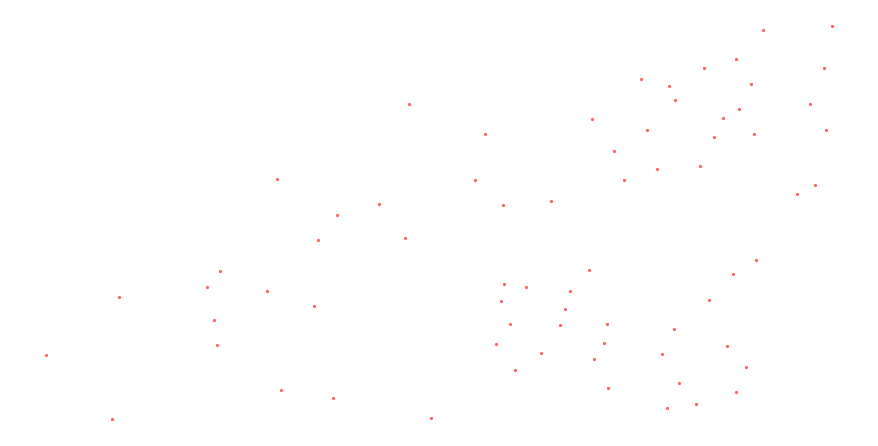

In [ ]:
#visualize all the world airport cities
plt.figure(figsize = (12,6))
nx.draw(may_rides, pos=stations, with_labels=False, arrows=False, node_size=5,
       node_color='red', alpha=0.5)

##Add Edges

In [ ]:
# create list of edges as tuples
# create list of 0 first

#for mayust
may_EN=len(may_df.index)
edgelist=[0]*may_EN
print (edgelist[:5])

[0, 0, 0, 0, 0]


In [ ]:
# create list of edges as tuples for mayust
for j in range(0,may_EN):
    edgelist[j]=(may_df['start_station_name'][j],may_df['end_station_name'][j], may_df['count'][j])
edgelist

[('11 St & Washington St', '11 St & Washington St', 290),
 ('11 St & Washington St', '12 Ave & W 40 St', 2),
 ('11 St & Washington St', '2 St HBLR - 2 St & Marshall St', 4),
 ('11 St & Washington St', '4 St & Grand St', 16),
 ('11 St & Washington St', '6 St & Grand St', 26),
 ('11 St & Washington St', '7 St & Monroe St', 5),
 ('11 St & Washington St', '8 St & Washington St', 33),
 ('11 St & Washington St', '9 St HBLR - Jackson St & 8 St', 3),
 ('11 St & Washington St', 'Adams St & 11 St', 17),
 ('11 St & Washington St', 'Baldwin at Montgomery', 1),
 ('11 St & Washington St', 'Bloomfield St & 15 St', 64),
 ('11 St & Washington St', 'Broadway & W 41 St', 2),
 ('11 St & Washington St', 'Brunswick & 6th', 4),
 ('11 St & Washington St', 'Brunswick St', 5),
 ('11 St & Washington St', 'Cabrini Blvd & W 177 St', 2),
 ('11 St & Washington St', 'Christ Hospital', 2),
 ('11 St & Washington St', 'Church Sq Park - 5 St & Park Ave', 49),
 ('11 St & Washington St', 'City Hall', 4),
 ('11 St & Washing

In [ ]:
# add edges to the network
may_rides.add_weighted_edges_from(edgelist)

In [ ]:
print (may_rides.in_degree(weight='weight')['Newport PATH'])
print (may_rides.out_degree(weight='weight')['Newport PATH'])

1526
1524


###Incoming and outgoing degree

In [ ]:
# Convert pandas dataframe and join two information - mayust
in_degree = pd.DataFrame.from_dict(dict(may_rides.in_degree()), orient='index').reset_index()
in_degree.columns = ['start_station_name', 'in_degree']
out_degree = pd.DataFrame.from_dict(dict(may_rides.out_degree()), orient='index').reset_index()
out_degree.columns = ['start_station_name', 'out_degree']

in_degree.head()

,start_station_name,in_degree
0,9 St HBLR - Jackson St & 8 St,23
1,Union St,22
2,Brunswick St,58
3,Heights Elevator,52
4,Bergen Ave,32


In [ ]:
in_out_degree = pd.merge(in_degree, out_degree, how='outer', on='start_station_name')
in_out_degree.sort_values(by='in_degree', ascending=False).head(10)

,start_station_name,in_degree,out_degree
31,Newport PATH,70,68
34,Hoboken Terminal - River St & Hudson Pl,69,66
63,Grove St PATH,67,64
62,Hamilton Park,67,64
54,Washington St,65,64
24,Newport Pkwy,64,66
48,Columbus Dr at Exchange Pl,62,59
64,South Waterfront Walkway - Sinatra Dr & 1 St,61,65
59,Brunswick & 6th,60,58
50,Warren St,60,57


In [ ]:
print(may_rides.in_degree())
print(may_rides.out_degree())

[('9 St HBLR - Jackson St & 8 St', 23), ('Union St', 22), ('Brunswick St', 58), ('Heights Elevator', 52), ('Bergen Ave', 32), ('City Hall', 58), ('Montgomery St', 48), ('Monmouth and 6th', 46), ('Jersey & 6th St', 48), ('Dixon Mills', 44), ('Dey St', 28), ('8 St & Washington St', 48), ('Newark Ave', 60), ('Columbus Park - Clinton St & 9 St', 37), ('2 St HBLR - 2 St & Marshall St', 34), ('Grand St & 2 St', 41), ('Glenwood Ave', 38), ('Pershing Field', 48), ('Madison St & 10 St', 33), ('Bloomfield St & 15 St', 54), ('Leonard Gordon Park', 31), ('Lincoln Park', 45), ('Grand St & 14 St', 47), ('Hoboken Ave at Monmouth St', 57), ('Newport Pkwy', 64), ('Journal Square', 44), ('Baldwin at Montgomery', 50), ('6 St & Grand St', 38), ('Harborside', 56), ('Marin Light Rail', 60), ('Lafayette Park', 48), ('Newport PATH', 70), ('4 St & Grand St', 24), ('7 St & Monroe St', 35), ('Hoboken Terminal - River St & Hudson Pl', 69), ('JC Medical Center', 55), ('Stevens - River Ter & 6 St', 31), ('Jersey & 

###Visualize the Citibike Routes Network

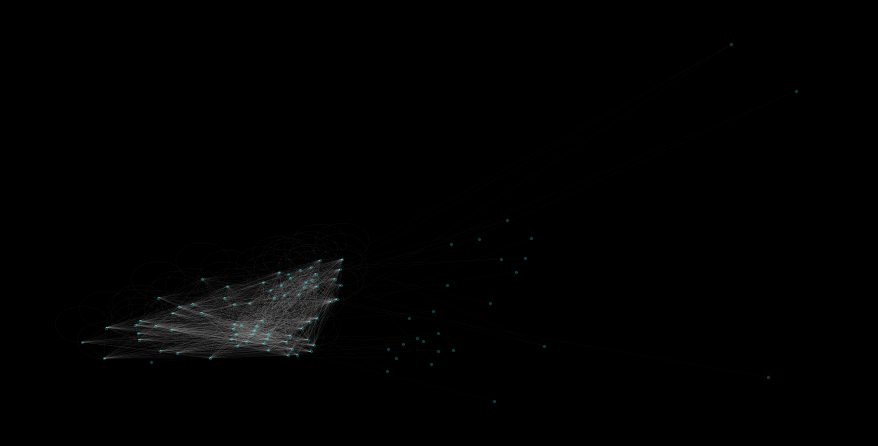

In [ ]:
#visualize the network
fig = plt.figure(figsize = (12,6))
nx.draw(may_rides, pos=stations, with_labels=False, arrows=False, node_size=5,
       node_color='cyan', alpha=0.2, style='dotted', edge_color='white', width=0.2)
fig.set_facecolor("#000")

In [40]:
fig = px.scatter_mapbox(tot,
                    lat='start_lat',
                    lon='start_lng',
                        color_discrete_sequence=px.colors.qualitative.Pastel,
                       mapbox_style='dark',
                        size = 'count',
                        hover_data = {'start_station_name': True})

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.update_layout(mapbox_zoom=10, 
                  mapbox_center = {"lat": 40.776789, "lon": -73.970212})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [41]:
py.plot(fig, filename="citibike_may", auto_open = True)

'https://plotly.com/~bkirthi/50/'

##Check other centrality scores of stations
* Degree centrality
* Eigenvector centrality

In [ ]:
#output top ten centrality scores, given the dictionary d
def topdict(d,tn):
#     ind=sorted(d, key=dict(d).get, reverse=True)
    ind = sorted(dict(c1), key=dict(c1).__getitem__, reverse=True)
    for i in range(0,tn):
        print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

Now compute five centrality metrics - degree, eigenvector, betweenness, closeness and pagerank - and output top 10 stations in terms according to those metrics

In [ ]:
# Degree centrality
c1= nx.degree(may_rides)
topdict(c1,10)

1|Newport PATH:138
2|Hoboken Terminal - River St & Hudson Pl:135
3|Hamilton Park:131
4|Grove St PATH:131
5|Newport Pkwy:130
6|Washington St:129
7|South Waterfront Walkway - Sinatra Dr & 1 St:126
8|City Hall:122
9|Newark Ave:122
10|Columbus Dr at Exchange Pl:121


In [ ]:
# Eigenvector centrality
c2= nx.eigenvector_centrality(may_rides)
topdict(c2,10)

1|Newport PATH:0.1623105492127287
2|Hoboken Terminal - River St & Hudson Pl:0.1608062087719165
3|Hamilton Park:0.15912199692514162
4|Grove St PATH:0.15842721857282863
5|Newport Pkwy:0.15288327595449466
6|Washington St:0.15406865120138769
7|South Waterfront Walkway - Sinatra Dr & 1 St:0.14487882102962832
8|City Hall:0.14019911045119382
9|Newark Ave:0.14723724588482487
10|Columbus Dr at Exchange Pl:0.15194848205015196


In [ ]:
#Betweenness centrality
c3 = nx.betweenness_centrality(may_rides)
topdict(c3,10)

1|Newport PATH:0.017474460265418913
2|Hoboken Terminal - River St & Hudson Pl:0.024180765121460272
3|Hamilton Park:0.008035545621988754
4|Grove St PATH:0.008012524074663695
5|Newport Pkwy:0.010467267146518598
6|Washington St:0.015063320604229312
7|South Waterfront Walkway - Sinatra Dr & 1 St:0.007256728972892545
8|City Hall:0.027938661266146463
9|Newark Ave:0.00614905552448937
10|Columbus Dr at Exchange Pl:0.005245603610980374


In [ ]:
#Closeness centrality
c4 = nx.closeness_centrality(may_rides)
topdict(c4,10)

1|Newport PATH:0.7114854072890954
2|Hoboken Terminal - River St & Hudson Pl:0.7016036655211912
3|Hamilton Park:0.6826414042908888
4|Grove St PATH:0.6826414042908888
5|Newport Pkwy:0.6560449859418931
6|Washington St:0.6646771568095496
7|South Waterfront Walkway - Sinatra Dr & 1 St:0.6314432989690721
8|City Hall:0.6086200471991057
9|Newark Ave:0.6236477026855033
10|Columbus Dr at Exchange Pl:0.6394362521205793


##Visualize the network with the node size proportional to the degree centrality (or any other centrality)

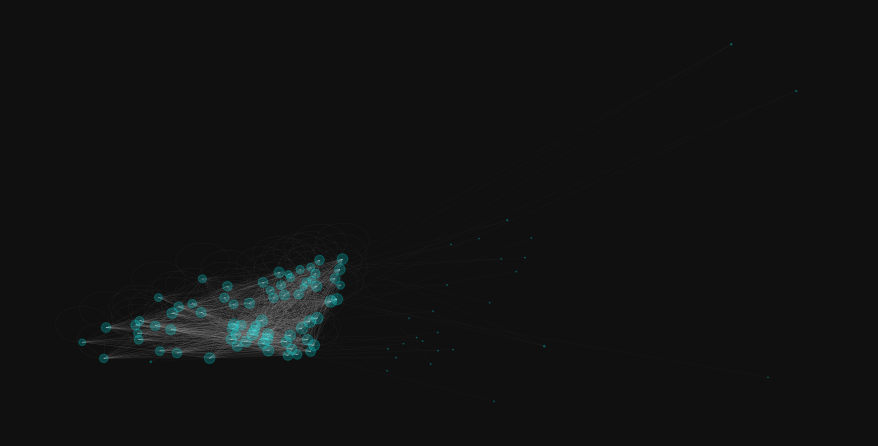

In [ ]:
node_size_original = list(dict(c1).values()) # based on degree centrality

#visualize the network
fig = plt.figure(figsize = (12,6))
nx.draw(may_rides, pos=stations, with_labels=False,arrows=False, 
        node_size=node_size_original, 
       node_color='cyan', alpha=0.2, style='dotted', edge_color='white', width=0.2)
fig.set_facecolor("#101010")